In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

# A/B Testing
In our sample, we can observe a difference in the distributions of the two groups. 
It is both visible from 
- the histograms and 
- from the differences of their means

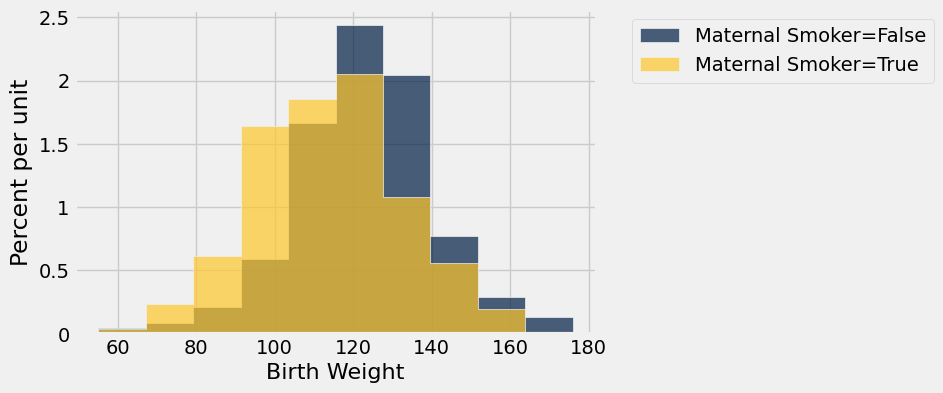

In [4]:
births = Table.read_table('data/baby.csv')
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [8]:
def difference_of_means(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, category_label)  
    
    # table containing group means
    means_table = reduced.group(category_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [16]:
observed_difference = difference_of_means(births, 'Birth Weight', 'Maternal Smoker')
observed_difference

-9.266142572024918

# Randomize labels
**Null** In the population, the distributions of the birth weights of the babies in the two groups are the same. (They are different in the sample just due to chance.)

- if the null was true, the labels should not matter 
- therefore, we can just shuffle the labels around and see what kind of differences in means we would get

In [10]:
def one_simulated_difference(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(category_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   

In [12]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

1.630162865456981

In [13]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

Observed Difference: -9.266142572024918


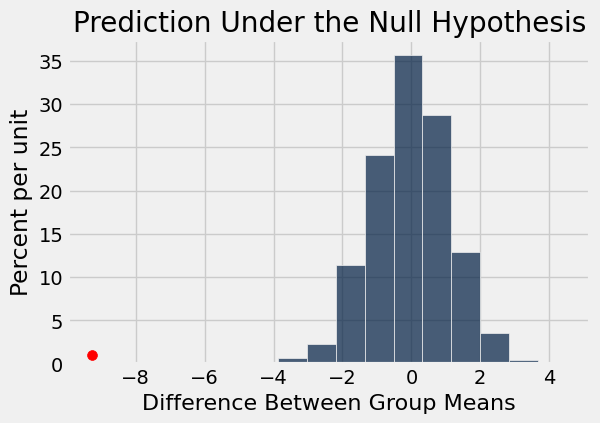

In [21]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis')
plots.scatter(observed_difference, 0.01, s=50, c='red')

# P-Value

In [22]:
sum(differences < observed_difference)

0

# Closing question
given the p-value (of 0), can we conclude that smoking **causes** lower birth rates?